In [1]:
!git clone https://github.com/ysenarath/traffic-accident-prediction.git

Cloning into 'traffic-accident-prediction'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 29 (delta 6), reused 26 (delta 5), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [2]:
cd traffic-accident-prediction

/content/traffic-accident-prediction


In [3]:
cd notebooks

/content/traffic-accident-prediction/notebooks


In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import altair as alt

In [7]:
# https://anonfile.com/fc66r6nfo6/data_zip

!wget https://cdn-33.anonfile.com/fc66r6nfo6/2c8bc5f5-1586360308/data.zip

--2020-04-08 15:29:31--  https://cdn-33.anonfile.com/fc66r6nfo6/2c8bc5f5-1586360308/data.zip
Resolving cdn-33.anonfile.com (cdn-33.anonfile.com)... 194.32.146.101, 2a0c:dd43:2:1::a
Connecting to cdn-33.anonfile.com (cdn-33.anonfile.com)|194.32.146.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58900671 (56M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  56.17M  2.60MB/s    in 21s     

2020-04-08 15:29:53 (2.65 MB/s) - ‘data.zip’ saved [58900671/58900671]



In [9]:
!unzip data.zip

Archive:  data.zip
  inflating: processed_dataset.csv   
   creating: __MACOSX/
  inflating: __MACOSX/._processed_dataset.csv  


In [10]:
ls

accident_visualizaiton.py.ipynb  data.zip   processed_dataset.csv
analize-data.py.ipynb            __MACOSX/  starter_baseline.py.ipynb


In [0]:
df = pd.read_csv('./processed_dataset.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757324 entries, 0 to 757323
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             757324 non-null  int64  
 1   ID                     757324 non-null  object 
 2   Source                 757324 non-null  object 
 3   TMC                    595289 non-null  float64
 4   Severity               757324 non-null  int64  
 5   Start_Time             757324 non-null  object 
 6   End_Time               757324 non-null  object 
 7   Start_Lat              757324 non-null  float64
 8   Start_Lng              757324 non-null  float64
 9   End_Lat                162035 non-null  float64
 10  End_Lng                162035 non-null  float64
 11  Distance(mi)           757324 non-null  float64
 12  Description            757323 non-null  object 
 13  Number                 283528 non-null  float64
 14  Street                 757324 non-nu

In [13]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
td = 'Time_Duration(min)'

In [15]:
# Print time_duration information
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'.format(df[td].max(),round(df[td].max()/60), round(df[td].max()/60/24), df[td].min()))

Max time to clear an accident: 111.0 minutes or 2 hours or 0 days; Min to clear an accident td: 29.0 minutes.


In [0]:
# Set the list of features to include in Machine Learning
feature_lst=['Source','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday']

In [20]:
print('\n'.join(feature_lst))

Source
Severity
Start_Lng
Start_Lat
Distance(mi)
Side
City
County
State
Timezone
Temperature(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Hour
Weekday


In [18]:
# Select the dataset to include only the selected features
df_sel=df[feature_lst].copy()
print(df_sel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757324 entries, 0 to 757323
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Source             757324 non-null  object 
 1   Severity           757324 non-null  int64  
 2   Start_Lng          757324 non-null  float64
 3   Start_Lat          757324 non-null  float64
 4   Distance(mi)       757324 non-null  float64
 5   Side               757324 non-null  object 
 6   City               757309 non-null  object 
 7   County             757324 non-null  object 
 8   State              757324 non-null  object 
 9   Timezone           756522 non-null  object 
 10  Temperature(F)     744061 non-null  float64
 11  Humidity(%)        743238 non-null  float64
 12  Pressure(in)       746712 non-null  float64
 13  Visibility(mi)     742942 non-null  float64
 14  Wind_Direction     742032 non-null  object 
 15  Weather_Condition  743031 non-null  object 
 16  Am

In [106]:
# Check missing values
df_sel.isnull().mean()

Source               0.000000
Severity             0.000000
Start_Lng            0.000000
Start_Lat            0.000000
Distance(mi)         0.000000
Side                 0.000000
City                 0.000020
County               0.000000
State                0.000000
Timezone             0.001059
Temperature(F)       0.017513
Humidity(%)          0.018600
Pressure(in)         0.014012
Visibility(mi)       0.018991
Wind_Direction       0.020192
Weather_Condition    0.018873
Amenity              0.000000
Bump                 0.000000
Crossing             0.000000
Give_Way             0.000000
Junction             0.000000
No_Exit              0.000000
Railway              0.000000
Roundabout           0.000000
Station              0.000000
Stop                 0.000000
Traffic_Calming      0.000000
Traffic_Signal       0.000000
Turning_Loop         0.000000
Sunrise_Sunset       0.000024
Hour                 0.000000
Weekday              0.000000
dtype: float64

In [107]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(734743, 32)

In [144]:
# Set state
state='NC'

# Select the state of Pennsylvania
df_state=df_sel.loc[df_sel.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36679 entries, 95 to 757193
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source             36679 non-null  object 
 1   Severity           36679 non-null  int64  
 2   Start_Lng          36679 non-null  float64
 3   Start_Lat          36679 non-null  float64
 4   Distance(mi)       36679 non-null  float64
 5   Side               36679 non-null  object 
 6   City               36679 non-null  object 
 7   County             36679 non-null  object 
 8   Timezone           36679 non-null  object 
 9   Temperature(F)     36679 non-null  float64
 10  Humidity(%)        36679 non-null  float64
 11  Pressure(in)       36679 non-null  float64
 12  Visibility(mi)     36679 non-null  float64
 13  Wind_Direction     36679 non-null  object 
 14  Weather_Condition  36679 non-null  object 
 15  Amenity            36679 non-null  bool   
 16  Bump               3

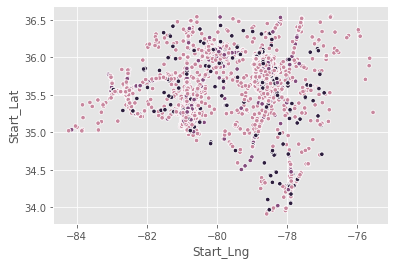

In [156]:
# Map of accidents, color code by county

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='Severity', legend=False, s=20)
plt.show()

In [146]:
# Generate dummies for categorical data
df_train = pd.get_dummies(df_state,drop_first=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36679 entries, 95 to 757193
Columns: 548 entries, Severity to Weekday_Wed
dtypes: bool(13), float64(7), int64(2), uint8(526)
memory usage: 21.7 MB


In [0]:
# Set the target for the prediction
target='Severity'

# Create arrays for the features and the response variable

# set X and y
y = df_train[target]
X = df_train.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [0]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

In [149]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Logistic regression algorithm] accuracy_score: 0.849.


In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.87      0.97      0.92      6211
           3       0.48      0.20      0.28      1046
           4       1.00      0.01      0.03        76

    accuracy                           0.85      7336
   macro avg       0.59      0.29      0.31      7336
weighted avg       0.82      0.85      0.82      7336



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
# Create a k-NN classifier with 6 neighbors
knn = DecisionTreeClassifier()

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.880.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.880.


In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.93      0.93      0.93      6211
           3       0.60      0.62      0.61      1046
           4       0.59      0.55      0.57        76

    accuracy                           0.88      7336
   macro avg       0.53      0.53      0.53      7336
weighted avg       0.88      0.88      0.88      7336



In [153]:
# Create a k-NN classifier with 6 neighbors
knn = RandomForestClassifier()

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.888.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.888.


In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.90      0.97      0.94      6211
           3       0.71      0.42      0.53      1046
           4       1.00      0.42      0.59        76

    accuracy                           0.89      7336
   macro avg       0.65      0.45      0.51      7336
weighted avg       0.88      0.89      0.87      7336



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
